In [0]:
import tensorflow as tf

import pandas as pd


import os
import zipfile
import matplotlib.pyplot as plt

In [0]:
from os import listdir
folders = [f for f in listdir('/content/drive/My Drive/fruits-360/Training')]

files_count =[]
for i in folders:
  files = []
  for f in listdir('/content/drive/My Drive/fruits-360/Training/{}'.format(i)):
      files.append(f)
  files_count.append(len(files))

In [0]:
files_p_f_count = dict(zip(folders,files_count))

In [0]:
files_p_f_count

{'Apple Braeburn': 492,
 'Apple Crimson Snow': 444,
 'Apple Golden 1': 480,
 'Apple Golden 2': 492,
 'Apple Golden 3': 481,
 'Apple Granny Smith': 492,
 'Apple Pink Lady': 456,
 'Apple Red 1': 492,
 'Apple Red 2': 492,
 'Apple Red 3': 429,
 'Apple Red Delicious': 490,
 'Apple Red Yellow 1': 492,
 'Apple Red Yellow 2': 672,
 'Apricot': 492,
 'Avocado': 427}

In [0]:
a = pd.DataFrame(files_p_f_count,index = [1])

In [0]:
a

,Apple Braeburn,Apple Crimson Snow,Apple Golden 1,Apple Golden 2,Apple Golden 3,Apple Granny Smith,Apple Pink Lady,Apple Red 1,Apple Red 2,Apple Red 3,Apple Red Delicious,Apple Red Yellow 1,Apple Red Yellow 2,Apricot,Avocado
1,492,444,480,492,481,492,456,492,492,429,490,492,672,492,427


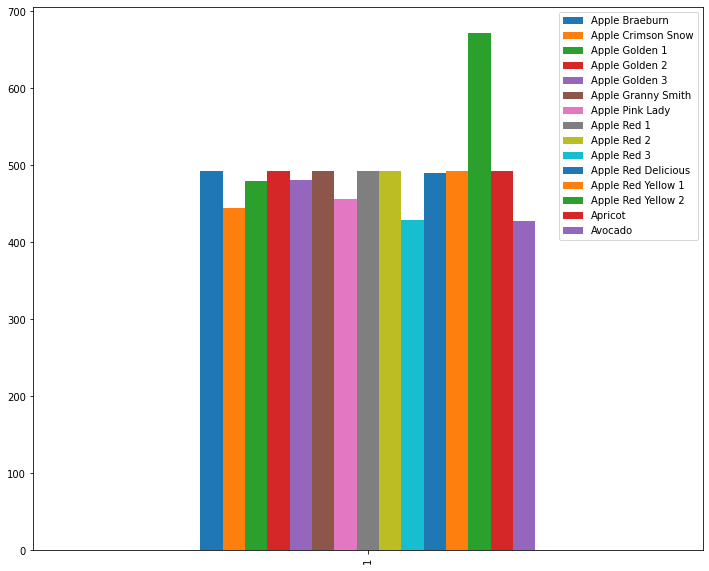

In [0]:
a.plot(kind = 'bar',figsize = (12,10))

In [0]:
#import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator


# Directory containing all the training images
TRAINING_DIR = "/content/drive/My Drive/fruits-360/Training"
CLASS_NAMES = os.listdir(TRAINING_DIR)
#Augmenting image with ImageDataGenerator
training_datagen = ImageDataGenerator(
      rescale = 1./255, #normalizing data
	    rotation_range=40, #rotating data randomly in range of 40 degrees
      width_shift_range=0.2, #changing width randomly by 20%
      height_shift_range=0.2, #changing height randomly by 20%
      shear_range=0.2, #Shear angle in counter-clockwise direction in degrees
      zoom_range=0.2, #zoom random images by 20%
      horizontal_flip=True, #producing mirror images
      fill_mode='nearest')

# defining class names
CLASS_NAMES = os.listdir(TRAINING_DIR)

#This method will identify classes automatically from the folder name. 
train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(100,100),
	class_mode='categorical',
  classes = CLASS_NAMES,
  batch_size=64
)

validation_datagen = ImageDataGenerator(rescale = 1./255)
VALIDATION_DIR = "/content/drive/My Drive/fruits-360/Test"
validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(100,100),
	class_mode='categorical',
  classes = CLASS_NAMES,
  batch_size=64
)


Found 7323 images belonging to 15 classes.
Found 2441 images belonging to 15 classes.


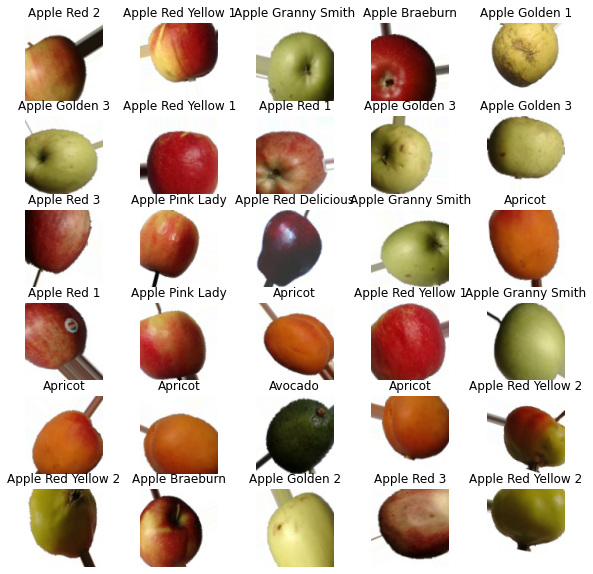

In [0]:
# view 30 sample images from training set

image, label = next(train_generator)

plt.figure(figsize=(10,10))

for n in range(0,30):
    ax = plt.subplot(6,5,n+1)
    plt.imshow(image[n+20])
    plt.axis('off')
    img_title = CLASS_NAMES[list(label[n+20]).index(1)] # get label name at index position where value in label_batch array is 1
    plt.title(img_title)

# Model with CNN and maxpool layers

In [0]:
#Defining call_back
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.95 and logs.get('val_accuracy') > 95):
      self.model.stop_training = True

In [0]:
callbacks = myCallback()

In [0]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(100, 100, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(15, activation='softmax')
])


model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 128)        

In [0]:
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.fit(train_generator, epochs=5, steps_per_epoch=1000, validation_data = validation_generator, verbose = 1,validation_steps=3, callbacks= [callbacks])

model.save('My_model.h5')
from google.colab import files
files.download('My_model.h5') 

Epoch 1/5
1000/1000 [==============================] - 2434s 2s/step - loss: 0.5897 - accuracy: 0.8008 - val_loss: 0.6269 - val_accuracy: 0.8490
Epoch 2/5
1000/1000 [==============================] - 323s 323ms/step - loss: 0.1991 - accuracy: 0.9487 - val_loss: 0.3264 - val_accuracy: 0.9531
Epoch 3/5
1000/1000 [==============================] - 321s 321ms/step - loss: 0.1515 - accuracy: 0.9633 - val_loss: 0.1591 - val_accuracy: 0.9479
Epoch 4/5
1000/1000 [==============================] - 324s 324ms/step - loss: 0.1353 - accuracy: 0.9703 - val_loss: 0.0201 - val_accuracy: 0.9948
Epoch 5/5
1000/1000 [==============================] - 325s 325ms/step - loss: 0.1416 - accuracy: 0.9730 - val_loss: 0.1082 - val_accuracy: 0.9688


TypeError: ignored

In [0]:
plt.plot(model.history["accuracy"])
plt.plot(model.history['val_accuracy'])

plt.legend(['accuracy', 'val_accuracy'])

In [0]:

model.save('My_model.h5')
from google.colab import files
files.download('My_model.h5') 

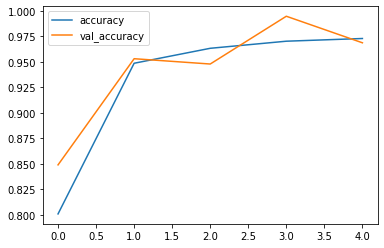

In [0]:
plt.plot(model.history.history["accuracy"])
plt.plot(model.history.history['val_accuracy'])

plt.legend(['accuracy', 'val_accuracy'])

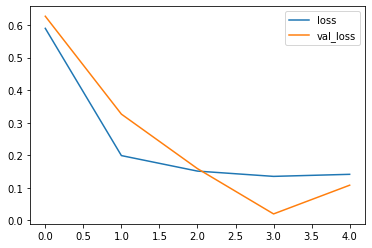

In [0]:
plt.plot(model.history.history["loss"])
plt.plot(model.history.history['val_loss'])

plt.legend(['loss', 'val_loss'])